# MULTI_ELEMENT_LITHOLOGY MACHINE LEARNING ANALYSIS FOR GOLD PREDICTION

Working in the Minig industry, Exploratio is an important preliminary step. Th dataset is comprised of 10 drilled diamond holes, samples sent to the laboratory for multi-element analysis.
The dataset consists of a column of 2020 rows and 38 columns .The columns contained 37 differnt elements, which are analyzed in the lab(inclusive of gold).As an exploration geologist this project can indicate the import elements thats important to analaysis, and also to see if the the inidcaive (Minerals)/elements are present on the rock type 
This project is aimed at finding patterns and predictive model, to predict if we accurately gold present from the result of past historic data.

In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (ConfusionMatrixDisplay,classification_report,confusion_matrix)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC

In [3]:
# Reading the column into a Dataframe

df = pd.read_excel('Multi -element analysis sheet for Machine Learning.xlsx')
df.set_index('Sample ID',inplace =True)  # Made the Sampke_id the index column

In [4]:
df.head(10)

,Lithology,Au_ppm,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,...,Sb_ppm,Sc_ppm,Sr_ppm,Th_ppm,Ti_pc,Tl_ppm,V_ppm,W_ppm,Zn_ppm,Zr_ppm
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,LAT,0.01,No,0.8,2.67,2,27,<10,<0.5,14,...,8,50,<1,<8,0.06,<10,803,<10,45,21
DD005002,LAT,0.01,No,<0.2,3.4,2,23,<10,<0.5,10,...,12,68,<1,<8,0.05,<10,1340,<10,40,20
DD005003,LAT,0.01,No,<0.2,5.36,<2,20,10,0.5,11,...,6,77,1,<8,0.05,<10,995,<10,49,18
DD005004,LAT,0.01,No,0.5,3.84,<2,18,<10,0.6,8,...,8,72,<1,<8,0.07,<10,569,<10,119,14
DD005005,SC,0.01,No,<0.2,2.82,<2,13,<10,<0.5,7,...,6,48,<1,<8,0.11,<10,514,<10,74,12
DD005006,SC,0.01,No,<0.2,2.2,<2,<10,12,<0.5,<2,...,<2,34,<1,<8,0.06,<10,427,<10,37,11
DD005007,SC,0.01,No,<0.2,1.99,<2,<10,<10,<0.5,4,...,4,49,<1,<8,0.06,<10,447,<10,44,8
DD005008,AMP,0.01,No,<0.2,2.04,<2,<10,<10,<0.5,4,...,3,32,<1,<8,0.08,<10,357,<10,49,7
DD005009,AMP,0.01,No,<0.2,1.76,<2,<10,<10,<0.5,3,...,3,30,<1,<8,0.07,<10,328,<10,122,6


In [5]:
#Replacing the '<' symbol in the dataframe

df= df.replace('<', '',regex = True)

In [6]:
#Rechecking the dataset 

df.head()


,Lithology,Au_ppm,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,...,Sb_ppm,Sc_ppm,Sr_ppm,Th_ppm,Ti_pc,Tl_ppm,V_ppm,W_ppm,Zn_ppm,Zr_ppm
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,LAT,0.01,No,0.8,2.67,2,27,10,0.5,14,...,8,50,1,8,0.06,10,803,10,45,21
DD005002,LAT,0.01,No,0.2,3.4,2,23,10,0.5,10,...,12,68,1,8,0.05,10,1340,10,40,20
DD005003,LAT,0.01,No,0.2,5.36,2,20,10,0.5,11,...,6,77,1,8,0.05,10,995,10,49,18
DD005004,LAT,0.01,No,0.5,3.84,2,18,10,0.6,8,...,8,72,1,8,0.07,10,569,10,119,14
DD005005,SC,0.01,No,0.2,2.82,2,13,10,0.5,7,...,6,48,1,8,0.11,10,514,10,74,12


In [7]:
#Checking for duplicates

df.duplicated().sum()

0

In [8]:
#Checking for missing values
df.isnull().sum()


Lithology    0
Au_ppm       0
AU_ppm       0
Ag_ppm       0
Al_pc        0
As_ppm       0
B_ppm        0
Ba_ppm       0
Be_ppm       0
Bi_ppm       0
Ca_pc        0
Cd_ppm       0
Co_ppm       0
Cr_ppm       0
Cu_ppm       0
Fe_pc        0
Ga_ppm       0
Hg_ppm2      0
K_ppm3       0
La_ppm4      0
Mg_ppm5      0
Mn_ppm6      0
Mo_ppm7      0
Na_ppm8      0
Ni_ppm       0
P_ppm        0
Pb_ppm       0
S_pc         0
Sb_ppm       0
Sc_ppm       0
Sr_ppm       0
Th_ppm       0
Ti_pc        0
Tl_ppm       0
V_ppm        0
W_ppm        0
Zn_ppm       0
Zr_ppm       0
dtype: int64

In [9]:
#Checking the datatypes of each column
df.dtypes

Lithology     object
Au_ppm       float64
AU_ppm        object
Ag_ppm        object
Al_pc         object
As_ppm        object
B_ppm         object
Ba_ppm        object
Be_ppm        object
Bi_ppm        object
Ca_pc         object
Cd_ppm        object
Co_ppm        object
Cr_ppm        object
Cu_ppm        object
Fe_pc         object
Ga_ppm        object
Hg_ppm2       object
K_ppm3        object
La_ppm4       object
Mg_ppm5       object
Mn_ppm6       object
Mo_ppm7       object
Na_ppm8       object
Ni_ppm        object
P_ppm         object
Pb_ppm        object
S_pc          object
Sb_ppm        object
Sc_ppm        object
Sr_ppm        object
Th_ppm        object
Ti_pc         object
Tl_ppm        object
V_ppm         object
W_ppm         object
Zn_ppm        object
Zr_ppm        object
dtype: object

In [10]:
df.head()

,Lithology,Au_ppm,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,...,Sb_ppm,Sc_ppm,Sr_ppm,Th_ppm,Ti_pc,Tl_ppm,V_ppm,W_ppm,Zn_ppm,Zr_ppm
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,LAT,0.01,No,0.8,2.67,2,27,10,0.5,14,...,8,50,1,8,0.06,10,803,10,45,21
DD005002,LAT,0.01,No,0.2,3.4,2,23,10,0.5,10,...,12,68,1,8,0.05,10,1340,10,40,20
DD005003,LAT,0.01,No,0.2,5.36,2,20,10,0.5,11,...,6,77,1,8,0.05,10,995,10,49,18
DD005004,LAT,0.01,No,0.5,3.84,2,18,10,0.6,8,...,8,72,1,8,0.07,10,569,10,119,14
DD005005,SC,0.01,No,0.2,2.82,2,13,10,0.5,7,...,6,48,1,8,0.11,10,514,10,74,12


In [11]:
#Changing the dattypes to float
df.iloc[:,3:38]= df.iloc[:,3:38].astype(float)


In [12]:
#Checking the datatypes
df.dtypes

Lithology     object
Au_ppm       float64
AU_ppm        object
Ag_ppm       float64
Al_pc        float64
As_ppm       float64
B_ppm        float64
Ba_ppm       float64
Be_ppm       float64
Bi_ppm       float64
Ca_pc        float64
Cd_ppm       float64
Co_ppm       float64
Cr_ppm       float64
Cu_ppm       float64
Fe_pc        float64
Ga_ppm       float64
Hg_ppm2      float64
K_ppm3       float64
La_ppm4      float64
Mg_ppm5      float64
Mn_ppm6      float64
Mo_ppm7      float64
Na_ppm8      float64
Ni_ppm       float64
P_ppm        float64
Pb_ppm       float64
S_pc         float64
Sb_ppm       float64
Sc_ppm       float64
Sr_ppm       float64
Th_ppm       float64
Ti_pc        float64
Tl_ppm       float64
V_ppm        float64
W_ppm        float64
Zn_ppm       float64
Zr_ppm       float64
dtype: object

In [13]:
#AU_ppm percentage check

df['AU_ppm'].value_counts(normalize =True)

No     0.933168
Yes    0.066832
Name: AU_ppm, dtype: float64

In [14]:
#Category checking of the AU, based oN lithology 

df.groupby('AU_ppm')['Lithology'].value_counts()

AU_ppm  Lithology
No      AMP          986
        BS           242
        SAP          171
        SZQ          159
        DGS           70
        SC            67
        PG            47
        LAT           42
        VQZ           36
        CS            33
        BMS           32
Yes     AMP           70
        SAP           25
        LAT           11
        BS            10
        SC             8
        SZQ            5
        BMS            2
        DGS            2
        PG             2
Name: Lithology, dtype: int64

In [15]:
#Here i copied the dataset, because would still want to use it for linear regression analysis
df2= df.copy()


In [16]:
#Dropped the AU_ppm column with the the actual value(would use for the regression analysis later)

df = df.drop('Au_ppm',axis =1)

In [17]:
df.head()

,Lithology,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,...,Sb_ppm,Sc_ppm,Sr_ppm,Th_ppm,Ti_pc,Tl_ppm,V_ppm,W_ppm,Zn_ppm,Zr_ppm
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,LAT,No,0.8,2.67,2.0,27.0,10.0,0.5,14.0,0.01,...,8.0,50.0,1.0,8.0,0.06,10.0,803.0,10.0,45.0,21.0
DD005002,LAT,No,0.2,3.40,2.0,23.0,10.0,0.5,10.0,0.01,...,12.0,68.0,1.0,8.0,0.05,10.0,1340.0,10.0,40.0,20.0
DD005003,LAT,No,0.2,5.36,2.0,20.0,10.0,0.5,11.0,0.01,...,6.0,77.0,1.0,8.0,0.05,10.0,995.0,10.0,49.0,18.0
DD005004,LAT,No,0.5,3.84,2.0,18.0,10.0,0.6,8.0,0.01,...,8.0,72.0,1.0,8.0,0.07,10.0,569.0,10.0,119.0,14.0
DD005005,SC,No,0.2,2.82,2.0,13.0,10.0,0.5,7.0,0.01,...,6.0,48.0,1.0,8.0,0.11,10.0,514.0,10.0,74.0,12.0


In [18]:
df.columns

Index(['Lithology', 'AU_ppm', 'Ag_ppm', 'Al_pc', 'As_ppm', 'B_ppm', 'Ba_ppm',
       'Be_ppm', 'Bi_ppm', 'Ca_pc', 'Cd_ppm', 'Co_ppm', 'Cr_ppm', 'Cu_ppm',
       'Fe_pc', 'Ga_ppm', 'Hg_ppm2', 'K_ppm3', 'La_ppm4', 'Mg_ppm5', 'Mn_ppm6',
       'Mo_ppm7', 'Na_ppm8', 'Ni_ppm', 'P_ppm', 'Pb_ppm', 'S_pc', 'Sb_ppm',
       'Sc_ppm', 'Sr_ppm', 'Th_ppm', 'Ti_pc', 'Tl_ppm', 'V_ppm', 'W_ppm',
       'Zn_ppm', 'Zr_ppm'],
      dtype='object')

##EXPLORATORY ANALYSIS
CHECK OUT THE DATA DICTIONARY FOR THE ABBREVATION MEANING

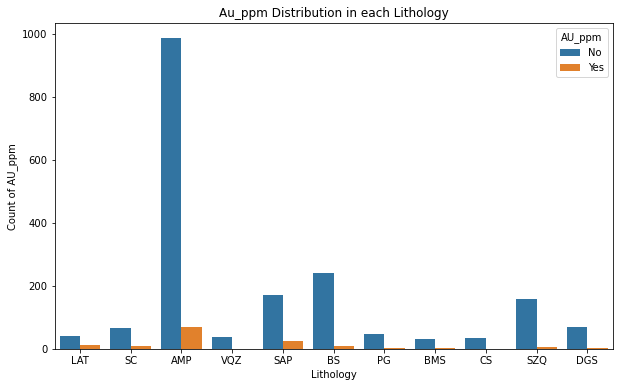

In [19]:
#Showing the distribution of Au_ppm in each lithology

plt.figure(figsize =(10,6))

sns.countplot(x ='Lithology', hue ='AU_ppm', data = df)

plt.xlabel('Lithology')
plt.ylabel('Count of AU_ppm')
plt.title('Au_ppm Distribution in each Lithology')
plt.show()

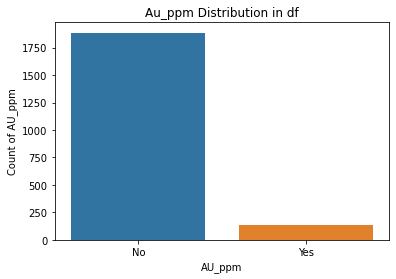

In [20]:
#AU_PPM dataset distribution 

sns.countplot(x ='AU_ppm',data = df)
plt.xlabel('AU_ppm')
plt.ylabel('Count of AU_ppm')
plt.title('Au_ppm Distribution in df')
plt.show()

This is not good news, because it seems that most of our samples does not contain AU. We should drill down a little bit further.
It also shows that  we have an inbalanced dataset, where the majority class is far biggger than the minority class

We knw that the dataset conatains 36 numerical value,it might be useful to see where the values of one of these feature cluster,
so lets make a boxplot to see how the values in 'S_pc and Fe_pc' are distributed, we selected 'S_pc' and Fe_pc which is represented as sulphur and Iron beacuse 'Fools gold' also known as 'Pyrite' is mostly associated with the geology of the area.

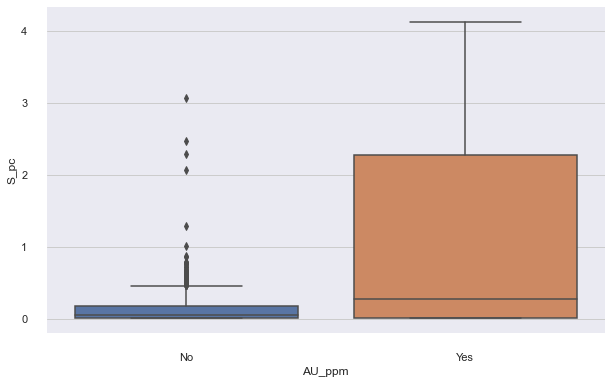

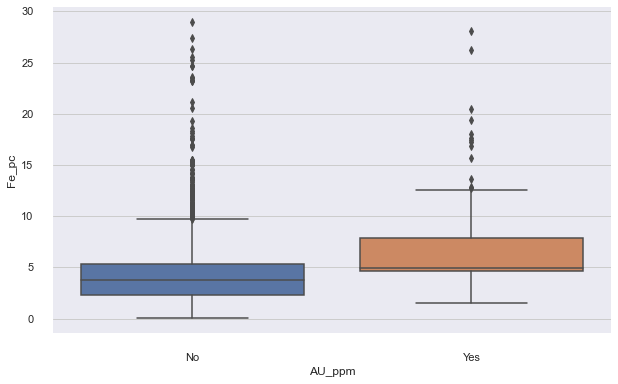

In [21]:
#Creating the Boxplot distribution for the S and Fe elements

for columns in df[['S_pc','Fe_pc']]:
    sns.set()
    fig,ax =plt.subplots()
    sns.set(style='ticks')
    sns.boxplot(x= 'AU_ppm', y =columns, data =df)
    sns.despine(offset =10, trim =True)
    fig.set_size_inches(10,6)

The boxplot is for us to see the quartiles distribution , but to get a clearer picture we wnt to see the exact statistics value

In [22]:
df[['Fe_pc','S_pc']].describe()#.apply("{0:,.0f}".format)  

,Fe_pc,S_pc
count,2020.000000,2020.000000
mean,4.660485,0.191564
std,3.482675,0.416475
min,0.010000,0.010000
25%,2.430000,0.010000
50%,3.920000,0.060000
75%,5.422500,0.210000
max,28.960000,4.130000


The mean of each of the element(Fe_ and S_) is gretaer than the median, which means he dataset is right skwewed, would plot a barplot to show it

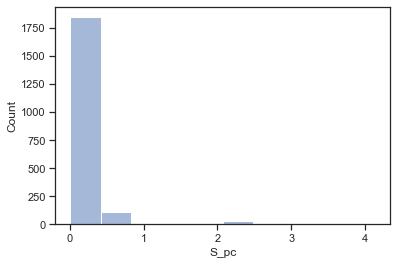

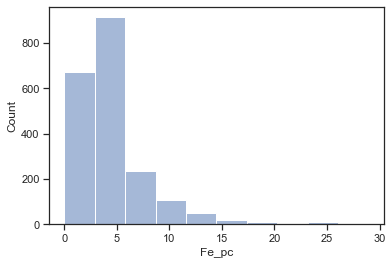

In [23]:
def plot_histogram(data,columns,bins =10):
    for col in columns:
        fig,ax =plt.subplots()
        sns.histplot(data =data, x=col, bins =bins, alpha =0.5)

plot_histogram(data =df,columns=['S_pc','Fe_pc'])

From above we can still see that the data is right_skewed, we have to balance the dataset too

<AxesSubplot:>

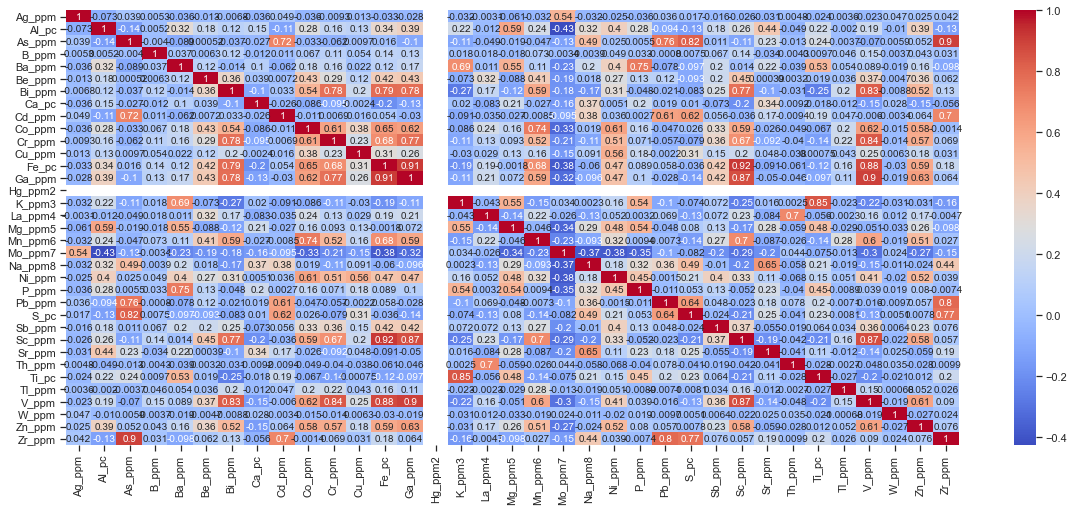

In [24]:
#We need to check for multicollinaerity in the dataset

corr = df.drop(columns =['Lithology','AU_ppm']).corr()
corr.head()
fig,ax= plt.subplots(figsize =(20,8))
sns.heatmap(corr,ax=ax,cmap ='coolwarm',annot = True,annot_kws={'size': 10})

#From here we see that we have a lot of multicollinearity issues, so we need to stay clea of linear models, 
#lets try a tree model instead

LETS START BUIDING OUR MODEL;

In [25]:
df

,Lithology,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,...,Sb_ppm,Sc_ppm,Sr_ppm,Th_ppm,Ti_pc,Tl_ppm,V_ppm,W_ppm,Zn_ppm,Zr_ppm
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,LAT,No,0.8,2.67,2.0,27.0,10.0,0.5,14.0,0.01,...,8.0,50.0,1.0,8.0,0.06,10.0,803.0,10.0,45.0,21.0
DD005002,LAT,No,0.2,3.40,2.0,23.0,10.0,0.5,10.0,0.01,...,12.0,68.0,1.0,8.0,0.05,10.0,1340.0,10.0,40.0,20.0
DD005003,LAT,No,0.2,5.36,2.0,20.0,10.0,0.5,11.0,0.01,...,6.0,77.0,1.0,8.0,0.05,10.0,995.0,10.0,49.0,18.0
DD005004,LAT,No,0.5,3.84,2.0,18.0,10.0,0.6,8.0,0.01,...,8.0,72.0,1.0,8.0,0.07,10.0,569.0,10.0,119.0,14.0
DD005005,SC,No,0.2,2.82,2.0,13.0,10.0,0.5,7.0,0.01,...,6.0,48.0,1.0,8.0,0.11,10.0,514.0,10.0,74.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DD007173,VQZ,No,0.2,1.19,2.0,10.0,49.0,0.5,2.0,0.49,...,2.0,4.0,30.0,8.0,0.09,10.0,22.0,10.0,33.0,5.0
DD007174,VQZ,No,0.2,2.44,2.0,10.0,119.0,0.9,2.0,1.51,...,2.0,5.0,70.0,8.0,0.11,10.0,29.0,10.0,18.0,5.0
DD007175,CS,No,0.3,1.18,2.0,10.0,58.0,0.5,2.0,14.51,...,2.0,2.0,133.0,8.0,0.06,10.0,17.0,10.0,91.0,5.0


In [26]:
df = df.replace({'AU_ppm':{'Yes':1,'No':0}})

In [27]:
df


,Lithology,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,...,Sb_ppm,Sc_ppm,Sr_ppm,Th_ppm,Ti_pc,Tl_ppm,V_ppm,W_ppm,Zn_ppm,Zr_ppm
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,LAT,0,0.8,2.67,2.0,27.0,10.0,0.5,14.0,0.01,...,8.0,50.0,1.0,8.0,0.06,10.0,803.0,10.0,45.0,21.0
DD005002,LAT,0,0.2,3.40,2.0,23.0,10.0,0.5,10.0,0.01,...,12.0,68.0,1.0,8.0,0.05,10.0,1340.0,10.0,40.0,20.0
DD005003,LAT,0,0.2,5.36,2.0,20.0,10.0,0.5,11.0,0.01,...,6.0,77.0,1.0,8.0,0.05,10.0,995.0,10.0,49.0,18.0
DD005004,LAT,0,0.5,3.84,2.0,18.0,10.0,0.6,8.0,0.01,...,8.0,72.0,1.0,8.0,0.07,10.0,569.0,10.0,119.0,14.0
DD005005,SC,0,0.2,2.82,2.0,13.0,10.0,0.5,7.0,0.01,...,6.0,48.0,1.0,8.0,0.11,10.0,514.0,10.0,74.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DD007173,VQZ,0,0.2,1.19,2.0,10.0,49.0,0.5,2.0,0.49,...,2.0,4.0,30.0,8.0,0.09,10.0,22.0,10.0,33.0,5.0
DD007174,VQZ,0,0.2,2.44,2.0,10.0,119.0,0.9,2.0,1.51,...,2.0,5.0,70.0,8.0,0.11,10.0,29.0,10.0,18.0,5.0
DD007175,CS,0,0.3,1.18,2.0,10.0,58.0,0.5,2.0,14.51,...,2.0,2.0,133.0,8.0,0.06,10.0,17.0,10.0,91.0,5.0


In [28]:
df['AU_ppm'].value_counts()

0    1885
1     135
Name: AU_ppm, dtype: int64

In [29]:
#The 'lithology ' column is a categorical data, so im using the dummmies to encode to improve accuracy of the model.

dummies = pd.get_dummies(df.Lithology)
dummies

,AMP,BMS,BS,CS,DGS,LAT,PG,SAP,SC,SZQ,VQZ
Sample ID,,,,,,,,,,,
DD005001,0,0,0,0,0,1,0,0,0,0,0
DD005002,0,0,0,0,0,1,0,0,0,0,0
DD005003,0,0,0,0,0,1,0,0,0,0,0
DD005004,0,0,0,0,0,1,0,0,0,0,0
DD005005,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
DD007173,0,0,0,0,0,0,0,0,0,0,1
DD007174,0,0,0,0,0,0,0,0,0,0,1
DD007175,0,0,0,1,0,0,0,0,0,0,0


In [30]:
#Merging the dummies variable and the dataframe

merged =pd.concat([df,dummies],axis =1)
merged

,Lithology,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,...,BMS,BS,CS,DGS,LAT,PG,SAP,SC,SZQ,VQZ
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,LAT,0,0.8,2.67,2.0,27.0,10.0,0.5,14.0,0.01,...,0,0,0,0,1,0,0,0,0,0
DD005002,LAT,0,0.2,3.40,2.0,23.0,10.0,0.5,10.0,0.01,...,0,0,0,0,1,0,0,0,0,0
DD005003,LAT,0,0.2,5.36,2.0,20.0,10.0,0.5,11.0,0.01,...,0,0,0,0,1,0,0,0,0,0
DD005004,LAT,0,0.5,3.84,2.0,18.0,10.0,0.6,8.0,0.01,...,0,0,0,0,1,0,0,0,0,0
DD005005,SC,0,0.2,2.82,2.0,13.0,10.0,0.5,7.0,0.01,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DD007173,VQZ,0,0.2,1.19,2.0,10.0,49.0,0.5,2.0,0.49,...,0,0,0,0,0,0,0,0,0,1
DD007174,VQZ,0,0.2,2.44,2.0,10.0,119.0,0.9,2.0,1.51,...,0,0,0,0,0,0,0,0,0,1
DD007175,CS,0,0.3,1.18,2.0,10.0,58.0,0.5,2.0,14.51,...,0,0,1,0,0,0,0,0,0,0


In [31]:
#Dropping the lithology column
df = merged.drop(['Lithology'],axis =1)
df

,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,Cd_ppm,...,BMS,BS,CS,DGS,LAT,PG,SAP,SC,SZQ,VQZ
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,0,0.8,2.67,2.0,27.0,10.0,0.5,14.0,0.01,0.5,...,0,0,0,0,1,0,0,0,0,0
DD005002,0,0.2,3.40,2.0,23.0,10.0,0.5,10.0,0.01,0.5,...,0,0,0,0,1,0,0,0,0,0
DD005003,0,0.2,5.36,2.0,20.0,10.0,0.5,11.0,0.01,0.5,...,0,0,0,0,1,0,0,0,0,0
DD005004,0,0.5,3.84,2.0,18.0,10.0,0.6,8.0,0.01,0.5,...,0,0,0,0,1,0,0,0,0,0
DD005005,0,0.2,2.82,2.0,13.0,10.0,0.5,7.0,0.01,0.5,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DD007173,0,0.2,1.19,2.0,10.0,49.0,0.5,2.0,0.49,0.5,...,0,0,0,0,0,0,0,0,0,1
DD007174,0,0.2,2.44,2.0,10.0,119.0,0.9,2.0,1.51,0.5,...,0,0,0,0,0,0,0,0,0,1
DD007175,0,0.3,1.18,2.0,10.0,58.0,0.5,2.0,14.51,0.5,...,0,0,1,0,0,0,0,0,0,0


In [32]:
#Dropping the endoded 'BMS' to avoid dummies bias

df=df.drop(['BMS'],axis =1)
df

,AU_ppm,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,Cd_ppm,...,AMP,BS,CS,DGS,LAT,PG,SAP,SC,SZQ,VQZ
Sample ID,,,,,,,,,,,,,,,,,,,,,
DD005001,0,0.8,2.67,2.0,27.0,10.0,0.5,14.0,0.01,0.5,...,0,0,0,0,1,0,0,0,0,0
DD005002,0,0.2,3.40,2.0,23.0,10.0,0.5,10.0,0.01,0.5,...,0,0,0,0,1,0,0,0,0,0
DD005003,0,0.2,5.36,2.0,20.0,10.0,0.5,11.0,0.01,0.5,...,0,0,0,0,1,0,0,0,0,0
DD005004,0,0.5,3.84,2.0,18.0,10.0,0.6,8.0,0.01,0.5,...,0,0,0,0,1,0,0,0,0,0
DD005005,0,0.2,2.82,2.0,13.0,10.0,0.5,7.0,0.01,0.5,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DD007173,0,0.2,1.19,2.0,10.0,49.0,0.5,2.0,0.49,0.5,...,0,0,0,0,0,0,0,0,0,1
DD007174,0,0.2,2.44,2.0,10.0,119.0,0.9,2.0,1.51,0.5,...,0,0,0,0,0,0,0,0,0,1
DD007175,0,0.3,1.18,2.0,10.0,58.0,0.5,2.0,14.51,0.5,...,0,0,1,0,0,0,0,0,0,0


In [33]:
df.columns

Index(['AU_ppm', 'Ag_ppm', 'Al_pc', 'As_ppm', 'B_ppm', 'Ba_ppm', 'Be_ppm',
       'Bi_ppm', 'Ca_pc', 'Cd_ppm', 'Co_ppm', 'Cr_ppm', 'Cu_ppm', 'Fe_pc',
       'Ga_ppm', 'Hg_ppm2', 'K_ppm3', 'La_ppm4', 'Mg_ppm5', 'Mn_ppm6',
       'Mo_ppm7', 'Na_ppm8', 'Ni_ppm', 'P_ppm', 'Pb_ppm', 'S_pc', 'Sb_ppm',
       'Sc_ppm', 'Sr_ppm', 'Th_ppm', 'Ti_pc', 'Tl_ppm', 'V_ppm', 'W_ppm',
       'Zn_ppm', 'Zr_ppm', 'AMP', 'BS', 'CS', 'DGS', 'LAT', 'PG', 'SAP', 'SC',
       'SZQ', 'VQZ'],
      dtype='object')

In [34]:
df.rename_axis(None,inplace =True)

In [35]:
#Assigning my X and y variables

target = 'AU_ppm'
X= df.drop(columns='AU_ppm',axis =1)
y =df['AU_ppm']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2020, 45)
y shape: (2020,)


In [36]:
#Splittting my datset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1616, 45)
y_train shape: (1616,)
X_test shape: (404, 45)
y_test shape: (404,)


In [37]:
y_train.head()

DD005261    0
DD005987    0
DD005720    1
DD005240    1
DD006666    0
Name: AU_ppm, dtype: int64

In [38]:
X_train.head()

,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,Cd_ppm,Co_ppm,...,AMP,BS,CS,DGS,LAT,PG,SAP,SC,SZQ,VQZ
DD005261,0.2,1.16,2.0,10.0,67.0,0.9,2.0,0.01,0.5,27.0,...,1,0,0,0,0,0,0,0,0,0
DD005987,0.2,5.47,2.0,10.0,70.0,0.5,3.0,0.85,0.5,46.0,...,1,0,0,0,0,0,0,0,0,0
DD005720,1.3,1.25,68.0,17.0,55.0,0.7,2.0,0.52,1.5,16.0,...,1,0,0,0,0,0,0,0,0,0
DD005240,0.8,1.28,68.0,10.0,59.0,0.7,2.0,0.55,1.6,19.0,...,0,0,0,0,0,0,0,1,0,0
DD006666,0.2,1.42,2.0,10.0,84.0,0.5,2.0,0.15,0.5,8.0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
#Changed my X and y to a numpy array

X= np.asarray(X)
y =np.asarray(y)

Remember our data is inbalanced, so i want to get the variables for the Under and over sampled data

In [40]:
#Trying out UNDER_sampling the dataset

under_sampling = RandomUnderSampler(random_state =42)
X_train_under,y_train_under = under_sampling.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(218, 45)


,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,Cd_ppm,Co_ppm,...,AMP,BS,CS,DGS,LAT,PG,SAP,SC,SZQ,VQZ
0,0.2,0.98,2.0,10.0,56.0,0.5,2.0,0.25,0.5,9.0,...,0,0,0,0,0,0,0,0,1,0
1,0.2,0.75,2.0,14.0,47.0,0.5,2.0,0.29,0.5,12.0,...,0,1,0,0,0,0,0,0,0,0
2,0.2,3.56,2.0,10.0,117.0,0.5,2.0,0.05,0.5,19.0,...,0,1,0,0,0,0,0,0,0,0
3,0.2,1.20,2.0,10.0,46.0,0.5,2.0,0.20,0.5,7.0,...,0,0,0,1,0,0,0,0,0,0
4,0.2,2.16,2.0,10.0,306.0,0.5,2.0,2.10,0.5,20.0,...,1,0,0,0,0,0,0,0,0,0


In [41]:
#Trying out OVER_sampling the dataset

over_sampling = RandomOverSampler(random_state =42)
X_train_over,y_train_over = over_sampling.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(3014, 45)


,Ag_ppm,Al_pc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pc,Cd_ppm,Co_ppm,...,AMP,BS,CS,DGS,LAT,PG,SAP,SC,SZQ,VQZ
0,0.2,1.16,2.0,10.0,67.0,0.9,2.0,0.01,0.5,27.0,...,1,0,0,0,0,0,0,0,0,0
1,0.2,5.47,2.0,10.0,70.0,0.5,3.0,0.85,0.5,46.0,...,1,0,0,0,0,0,0,0,0,0
2,1.3,1.25,68.0,17.0,55.0,0.7,2.0,0.52,1.5,16.0,...,1,0,0,0,0,0,0,0,0,0
3,0.8,1.28,68.0,10.0,59.0,0.7,2.0,0.55,1.6,19.0,...,0,0,0,0,0,0,0,1,0,0
4,0.2,1.42,2.0,10.0,84.0,0.5,2.0,0.15,0.5,8.0,...,0,0,0,0,0,0,0,0,0,1


Getting the baseline accuracy score, to get a perfect idea of the acuracy score we would be working with

In [42]:
accuracy_baseline = y_train.value_counts(normalize = True).max()

In [43]:
accuracy_baseline

0.932549504950495

I needed to evaluate the accuracy of various models on the entire dataset, including the normal dataset, by computing cross-validation scores. The KNN had th highest Cv accuracy

In [44]:
#list of models
models = [LogisticRegression(max_iter =10000), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier()]

In [45]:
# Here i am iteraing over the models, to get the cross-validation scores for 5 folds, and also gering the accuracy scores for
#each of the model
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X, y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

In [46]:
compare_models_cross_validation()

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Cross Validation accuracies for the LogisticRegression(max_iter=10000) = [0.94306931 0.9529703  0.96039604 0.92079208 0.96534653]
Acccuracy score of the  LogisticRegression(max_iter=10000) = 94.85 %
---------------------------------------------------------------
Cross Validation accuracies for the DecisionTreeClassifier() = [0.88861386 0.93811881 0.90594059 0.86386139 0.93811881]
Acccuracy score of the  DecisionTreeClassifier() = 90.69 %
---------------------------------------------------------------
Cross Validation accuracies for the KNeighborsClassifier() = [0.93069307 0.9480198  0.95792079 0.92326733 0.96287129]
Acccuracy score of the  KNeighborsClassifier() = 94.46 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestClassifier() = [0.9480198  0.95049505 0.97029703 0.92574257 0.96534653]
Acccuracy score of the  RandomForestClassifier() = 95.2 %
---------------------------------------------------------------


In [47]:
# Here i am iteraing over the models, to get the cross-validation scores for 5 folds, and also getting the accuracy scores for
#each of the model, also getting the Accuracy scores of the Over sampled and Undersampled data.
#Noticed that there was multicollinaerity in my data, so used PCA to rduce dimensionality

from sklearn.decomposition import PCA
logreg = LogisticRegression(max_iter=1000)
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

models = [logreg, tree, forest]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Cross-validation scores for each model
for model in models:
    cv_score = cross_val_score(model, X_pca, y, cv=5)
    mean_accuracy = round(np.mean(cv_score)*100, 2)
    print('Cross Validation accuracies for', model.__class__.__name__, '=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    
    # Undersampling
    under_sampling = RandomUnderSampler(random_state=42)
    X_train_under, y_train_under = under_sampling.fit_resample(X_train, y_train)
    model.fit(X_train_under, y_train_under)
    y_pred_under = model.predict(X_test)
    accuracy_under = round(accuracy_score(y_test, y_pred_under), 2)
    print('Accuracy score of', model.__class__.__name__, 'with RandomUnderSampler =', accuracy_under, '%')
  
    
    # Oversampling
    over_sampling = RandomOverSampler(random_state=42)
    X_train_over, y_train_over = over_sampling.fit_resample(X_train, y_train)
    model.fit(X_train_over, y_train_over)
    y_pred_over = model.predict(X_test)
    accuracy_over = round(accuracy_score(y_test, y_pred_over), 2)
    print('Accuracy score of', model.__class__.__name__, 'with RandomOverSampler =', accuracy_over, '%')
   

Cross Validation accuracies for LogisticRegression = [0.94554455 0.94554455 0.96039604 0.88861386 0.96039604]
Acccuracy score of the  LogisticRegression(max_iter=1000) = 94.01 %


C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of LogisticRegression with RandomUnderSampler = 0.76 %


C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of LogisticRegression with RandomOverSampler = 0.82 %
Cross Validation accuracies for DecisionTreeClassifier = [0.92821782 0.91089109 0.96287129 0.88861386 0.93811881]
Acccuracy score of the  DecisionTreeClassifier() = 92.57 %
Accuracy score of DecisionTreeClassifier with RandomUnderSampler = 0.7 %
Accuracy score of DecisionTreeClassifier with RandomOverSampler = 0.92 %
Cross Validation accuracies for RandomForestClassifier = [0.94554455 0.9480198  0.96782178 0.91584158 0.96534653]
Acccuracy score of the  RandomForestClassifier() = 94.85 %
Accuracy score of RandomForestClassifier with RandomUnderSampler = 0.78 %
Accuracy score of RandomForestClassifier with RandomOverSampler = 0.96 %


In [48]:
y_train_over.value_counts(normalize=True)

0    0.5
1    0.5
Name: AU_ppm, dtype: float64

In [49]:
#Here I are standardizing the data then , then using the threee different training dataset


model_reg = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=42))
model_reg.fit(X_train,y_train)

model_under = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=42))
model_under.fit(X_train_under,y_train_under)

model_over = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=42))
model_over.fit(X_train_over,y_train_over)





Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [50]:
#Here we are iterating over the the list of the models created above

model_list = [model_reg, model_under, model_over]
model_names = []
for m in model_list:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)
    model_name = m.__class__.__name__
    model_names.append(model_name)
    print('Training accuracy for', model_name, '=', acc_train)
    print('Test accuracy for', model_name, '=', acc_test)

Training accuracy for Pipeline = 1.0
Test accuracy for Pipeline = 0.9554455445544554
Training accuracy for Pipeline = 0.8446782178217822
Test accuracy for Pipeline = 0.7821782178217822
Training accuracy for Pipeline = 1.0
Test accuracy for Pipeline = 0.9529702970297029


In [51]:
#standardizing the data and trainng a RandonForest model

model_over = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=42))

In [52]:
#I am estimating the accuracy of the model pipeline using crossvalidation

cv_acc = cross_val_score(model_over,X_train_over,y_train_over,cv =5, n_jobs =-1)

In [53]:
print (cv_acc)

[0.99502488 0.99834163 0.99502488 0.99668325 0.99169435]


In [54]:
#Here im defining the hyperparameters

param = {'randomforestclassifier__n_estimators':range(25,100,25),
          'randomforestclassifier__max_depth':range(10,50,10)}

In [55]:
print(param)

{'randomforestclassifier__n_estimators': range(25, 100, 25), 'randomforestclassifier__max_depth': range(10, 50, 10)}


In [56]:
#Perfomig a gridsearch to prtimize the hyperpparameters
model_over = GridSearchCV(model_over,param_grid=param,cv=5,n_jobs =-1,verbose =1)

In [57]:
print(model)

RandomForestClassifier()


In [58]:
model_over.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [59]:
result = pd.DataFrame(model_over.cv_results_)

In [60]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.278853,0.018866,0.023138,0.007762,10,25,"{'randomforestclassifier__max_depth': 10, 'ran...",0.991708,0.986733,0.995025,0.988391,0.985050,0.989381,0.003578,12
1,0.471738,0.014397,0.025731,0.006893,10,50,"{'randomforestclassifier__max_depth': 10, 'ran...",0.993367,0.996683,0.990050,0.991708,0.986711,0.991704,0.003323,11
2,0.748002,0.029877,0.038693,0.013754,10,75,"{'randomforestclassifier__max_depth': 10, 'ran...",0.995025,0.996683,0.993367,0.991708,0.988372,0.993031,0.002859,7
3,0.275264,0.021137,0.015959,0.005047,20,25,"{'randomforestclassifier__max_depth': 20, 'ran...",0.991708,0.993367,0.993367,0.995025,0.990033,0.992700,0.001696,8
4,0.494676,0.030635,0.029921,0.013791,20,50,"{'randomforestclassifier__max_depth': 20, 'ran...",0.995025,0.995025,0.995025,0.995025,0.991694,0.994359,0.001332,4
5,0.678185,0.015932,0.026929,0.001411,20,75,"{'randomforestclassifier__max_depth': 20, 'ran...",0.995025,0.995025,0.995025,0.996683,0.991694,0.994690,0.001630,1
6,0.243149,0.006506,0.013964,0.001670,30,25,"{'randomforestclassifier__max_depth': 30, 'ran...",0.991708,0.993367,0.993367,0.993367,0.990033,0.992368,0.001332,9
7,0.431444,0.032056,0.020944,0.002600,30,50,"{'randomforestclassifier__max_depth': 30, 'ran...",0.996683,0.995025,0.995025,0.995025,0.991694,0.994690,0.001630,1
8,0.655845,0.040392,0.026330,0.000488,30,75,"{'randomforestclassifier__max_depth': 30, 'ran...",0.993367,0.995025,0.995025,0.996683,0.991694,0.994359,0.001696,4
9,0.211632,0.003179,0.013365,0.001493,40,25,"{'randomforestclassifier__max_depth': 40, 'ran...",0.991708,0.993367,0.993367,0.993367,0.990033,0.992368,0.001332,9


In [61]:
#Checking out the best hyperparameer

model_over.best_params_


{'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__n_estimators': 75}

In [62]:
y_test.value_counts()

0    378
1     26
Name: AU_ppm, dtype: int64

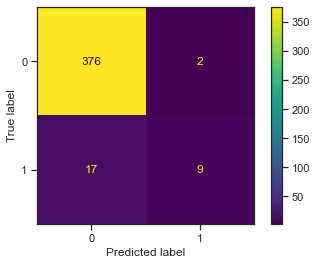

In [63]:
ConfusionMatrixDisplay.from_estimator(model_over,X_test,y_test)

Text(0.5, 1.0, 'Feature Importance')

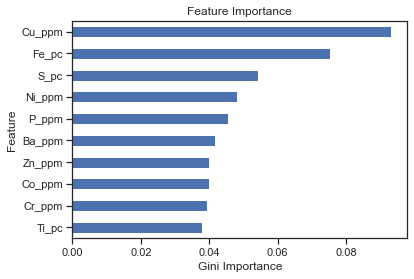

In [64]:
#Plotting an horizontal barchart to see the most important features
#Cu ,Fe,S are the top important features
#This is actually true, because the region where the data was gotten from, Amphibolite is the dominant rock type,
#with chalcoyrite(CuFeS2) and Pyrite(FeS) as the dominant accessory mineral

features =X_train_over.columns
importances = model_over.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
feat_imp =pd.Series(importances, index=features).sort_values()
feat_imp.tail(10).plot(kind ='barh')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

In [65]:
y_pred = model_over.predict(X_test)

In [66]:
y_true =y_test

In [67]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       378
           1       0.82      0.35      0.49        26

    accuracy                           0.95       404
   macro avg       0.89      0.67      0.73       404
weighted avg       0.95      0.95      0.94       404



Text(0.5, 1.0, 'Feature Importance')

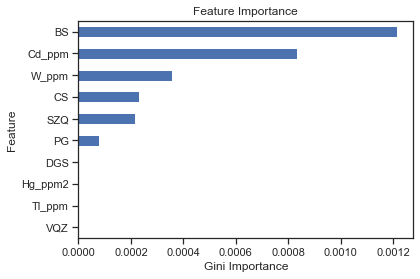

In [68]:
features =X_train_over.columns
importances = model_over.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
feat_imp =pd.Series(importances, index=features).sort_values()
feat_imp.head(10).plot(kind ='barh')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')